# [A] Preliminary

In [1]:
### Importing Libraries

import os
import sys
import datetime

import numpy as np
import pandas as pd
import allel
import vcf
import matplotlib
import matplotlib.pyplot as plt
import pickle

# Random Seed
random_seed = 0
np.random.seed(random_seed)

# from sklearn.manifold import TSNE

In [2]:
def get_time():
    return datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S') + ' : '

In [3]:
### Initializing log file

with open("log.txt",'w',encoding = 'utf-8') as f:
    f.write("LOG FILE  \n")
    
    f.write("\n-------------------------------------------------------\n")
    f.write('Python' + ' : ' + sys.version.split('|')[0] + '\n\n')
    
    f.write("Packages used : \n")
    
    f.write('numpy' + '\t\t:' + np.__version__ + '\n')
    f.write('pandas' + '\t\t:' + pd.__version__ + '\n')
    f.write('allel' + '\t\t:' + allel.__version__ + '\n')
    f.write('matplotlib' + '\t:' + matplotlib.__version__ + '\n')
    f.write('pickle' + '\t\t:' + pickle.format_version + '\n')
    f.write('vcf' + '\t\t\t:' + vcf.VERSION + '\n')
    
    f.write("\n-------------------------------------------------------\n")
    f.write("Random Seed used : " + str(random_seed) + '\n')
    f.write("Approximate Runtime : 60 mins [First run]\n")
    f.write("Approximate Runtime : 35 mins [From Second run]\n")
    
    f.write("\n-------------------------------------------------------\n")   
    f.write(get_time() + '[A] Program Started \n')

# [B] Reading Files

In [4]:
### Importing labels and colours

def read_files(data_path):
    '''
    Importes the files :
     * Labels     : ___.tsv file 
     * Colours    : ___.panel file 
    '''

    label_path = os.path.join(data_path,'20131219.populations.tsv')
    colour_path = os.path.join(data_path,'affy_samples.20141118.panel')

    labels = pd.read_csv(label_path, sep='\t')
    colours = pd.read_csv(colour_path, sep='\t')
    
    return colours, labels

# Change 'data_path' to the location of dataset.
data_path = "/mnt/2/G3C_2/data"

colours, labels = read_files(data_path)

In [5]:
%%time
def read_save_data(data_path):
    
    # Reading the data
    read_path = os.path.join(data_path,'ALL.wgs.nhgri_coriell_affy_6.20140825.genotypes_has_ped.vcf')
    data = allel.read_vcf(read_path)

    # Saving to .npz file for easier access
    save_path = os.path.join(data_path,'ALL.wgs.nhgri_coriell_affy_6.20140825.genotypes_has_ped.npz')
    allel.vcf_to_npz(read_path, save_path, fields='*', overwrite=True)
    
# Change 'data_path' to the location of dataset.
# data_path shoud contain the unzipped ___.vcf file.
data_path = "/mnt/2/G3C_2/data2"

### NOTE : Uncomment during first run to save data as .npz file ###
read_save_data(data_path)

# time : 22mins

CPU times: user 20min 29s, sys: 33.1 s, total: 21min 2s
Wall time: 21min 39s


In [7]:
%%time

# Loading from .npz file to dict 'data'.
npz_path = os.path.join(data_path,'ALL.wgs.nhgri_coriell_affy_6.20140825.genotypes_has_ped.npz')
data_npz = np.load(npz_path)

# Dict to store our 'data' in.
data = {}

for file in data_npz.files:
    data[file] = data_npz[file]    
            
# time : 30s

CPU times: user 25.8 s, sys: 2.8 s, total: 28.6 s
Wall time: 28.9 s


In [8]:
### Updating the log file

with open("log.txt",'a',encoding = 'utf-8') as f:    
    f.write(get_time() + '[B] Reading files completed\n')

# [C] Data Exploration

In [9]:
v = vcf.Reader(filename='data/ALL.wgs.nhgri_coriell_affy_6.20140825.genotypes_has_ped.vcf.gz')
info = v.infos

print("Description of vcf:")
for key in info.keys():
    print(key, "\t: ", info[key].desc)

Description of vcf:
AC 	:  Allele count in genotypes, for each ALT allele, in the same order as listed
AF 	:  Allele Frequency, for each ALT allele, in the same order as listed
AN 	:  Total number of alleles in called genotypes
DB 	:  dbSNP membership
NS 	:  Number of Samples With Data
SF 	:  Source File (index to sourceFiles, f when filtered)
set 	:  Source VCF for the merged record in CombineVariants


In [10]:
print("Contents of vcf:")
for key in data.keys():
    print(key + " : " + str(data[key].shape))

Contents of vcf:
samples : (3450,)
calldata/GT : (905788, 3450, 2)
variants/AC : (905788, 3)
variants/AF : (905788, 3)
variants/ALT : (905788, 3)
variants/AN : (905788,)
variants/CHROM : (905788,)
variants/DB : (905788,)
variants/FILTER_PASS : (905788,)
variants/ID : (905788,)
variants/NS : (905788,)
variants/POS : (905788,)
variants/QUAL : (905788,)
variants/REF : (905788,)
variants/SF : (905788,)
variants/altlen : (905788, 3)
variants/is_snp : (905788,)
variants/numalt : (905788,)
variants/set : (905788,)


In [11]:
### Data shapes

print("Data    : ", data['calldata/GT'].shape)
print("Colours : ", colours.shape)
print("Labels  : ", labels.shape)

Data    :  (905788, 3450, 2)
Colours :  (3450, 3)
Labels  :  (29, 9)


In [12]:
labels.head(10)

Population Description Population Code Super Population  \
0  Chinese Dai in Xishuangbanna, China             CDX              EAS   
1         Han Chinese in Bejing, China             CHB              EAS   
2             Japanese in Tokyo, Japan             JPT              EAS   
3    Kinh in Ho Chi Minh City, Vietnam             KHV              EAS   
4          Southern Han Chinese, China             CHS              EAS   
5                Bengali in Bangladesh             BEB              SAS   
6        Gujarati Indian in Houston,TX             GIH              SAS   
7              Indian Telugu in the UK             ITU              SAS   
8           Punjabi in Lahore,Pakistan             PJL              SAS   
9           Sri Lankan Tamil in the UK             STU              SAS   

  DNA from Blood Offspring available from trios  Pilot Samples  \
0             no                            yes            0.0   
1             no                             no           91.0   
2             no                             no           94.0   
3            yes                            yes            0.0   
4             no                            yes            0.0   
5             no                            yes            0.0   
6             no                            yes            0.0   
7            yes                            yes            0.0   
8            yes                            yes            0.0   
9            yes                            yes            0.0   

   Phase1 Samples  Final Phase Samples  Total  
0             0.0                 99.0   99.0  
1            97.0                103.0  106.0  
2            89.0                104.0  105.0  
3             0.0                101.0  101.0  
4           100.0                108.0  112.0  
5             0.0                 86.0   86.0  
6             0.0                106.0  106.0  
7             0.0                103.0  103.0  
8             0.0                 96.0   96.0  
9             0.0                103.0  103.0

In [13]:
colours.head(10)

sample  pop  in phase 3
0  HG00096  GBR           1
1  HG00097  GBR           1
2  HG00098  GBR           0
3  HG00099  GBR           1
4  HG00100  GBR           1
5  HG00101  GBR           1
6  HG00102  GBR           1
7  HG00104  GBR           0
8  HG00105  GBR           1
9  HG00106  GBR           1

In [14]:
### Samples per population code

for code in list(labels['Population Code']):
    code_count = ((colours['pop'] == code)).sum()
    print(code,' : ',code_count)

CDX  :  105
CHB  :  105
JPT  :  105
KHV  :  121
CHS  :  171
BEB  :  143
GIH  :  111
ITU  :  118
PJL  :  155
STU  :  128
ASW  :  107
ACB  :  122
ESN  :  172
GWD  :  180
LWK  :  110
MSL  :  122
YRI  :  182
GBR  :  105
FIN  :  104
IBS  :  162
TSI  :  111
CEU  :  183
CLM  :  146
MXL  :  104
PEL  :  129
PUR  :  149
nan  :  0
nan  :  0
nan  :  0


In [15]:
# For NaN count=0, so dropping them as they have no use as labels
labels = labels.dropna()

# Mapping population labels to indices from 0-25 for later use
pop_map = {}

for index in range(len(labels['Population Code'])):
    pop_map[labels['Population Code'][index]] = index

In [16]:
### Updating the log file

with open("log.txt",'a',encoding = 'utf-8') as f:    
    f.write(get_time() + '[C] Data Exploration completed\n')

# [D] Dimensionality reduction

In [17]:
### Getting data into a Genotype Array

allele_data = allel.GenotypeChunkedArray(data['calldata/GT'])
allele_data

<GenotypeChunkedArray shape=(905788, 3450, 2) dtype=int8
   nbytes=5.8G
   values=numpy.ndarray>

In [18]:
%%time

### Filtering out singletons and multiallelic SNPs

allele_count = allele_data.count_alleles()[:]
filter = (allele_count.max_allele() == 1) & (allele_count[:, :2].min(axis=1) > 1)
allele_data = allele_data.compress(filter, axis=0)

# time : 100s

CPU times: user 2min 25s, sys: 5.16 s, total: 2min 31s
Wall time: 1min 16s


In [19]:
%%time

allele_data = allele_data.to_n_alt()

# Randomply choosing SNPs
# Note : n = 100,000 is faster and gives only slightly less accurate results.
#      : n = 300,000 is more accurate.

# No of SNPs to retain
n = 300000

# Retaining selected SNPs
choose = np.random.choice(allele_data.shape[0], n, replace=False)
choose.sort()
allele_data = allele_data.take(choose, axis=0)

# time : 2min

CPU times: user 3min 50s, sys: 7.95 s, total: 3min 58s
Wall time: 1min 50s


In [20]:
%%time

def ld_prune(allele_data):
    '''
    ld-pruning the data to remove correlated SNPs.
    '''
    
    unlinked = allel.locate_unlinked(allele_data, size=500, step=200, threshold=.1)
    n_count = np.count_nonzero(unlinked)
        
    print('Retained : ', n_count, ' variants')
    print('Removed  : ', allele_data.shape[0] - n_count, ' variants')
    
    allele_data = allele_data.compress(unlinked, axis=0)
    return allele_data

# LD pruning the data
allele_data = ld_prune(allele_data)

# time : 20min

Retained :  106022  variants
Removed  :  193978  variants
CPU times: user 19min 45s, sys: 1.22 s, total: 19min 46s
Wall time: 19min 46s


In [21]:
# Getting allele_data from chunked storage

allele_data = allele_data[:]

In [23]:
%%time

# Projecting onto the principal axes
axes,model = allel.pca(allele_data, n_components=2, scaler='patterson')

# time : 5min

CPU times: user 9min 34s, sys: 19.2 s, total: 9min 53s
Wall time: 5min 39s


In [24]:
# Saving low dimensional projections
np.savetxt("coordinates.csv", axes, delimiter=",")

In [25]:
### Updating the log file

with open("log.txt",'a',encoding = 'utf-8') as f:   
    f.write(get_time() + '[D] Saved \'coordinates.csv\'\n')
    f.write(get_time() + '[D] Dimensionality Reduction Completed\n')

# [E] Backing up

In [26]:
### Saving data 

# Uncomment and run to dump data.
# Location : main folder containing script

# with open("allele_data_300k.txt", "wb") as fp:
#     pickle.dump(allele_data, fp)

# with open("axes_300k.txt", "wb") as fp:
#     pickle.dump(axes, fp)

In [27]:
### Loading saved data

# Uncomment and run to load data.
# Location : main folder containing script

# with open("allele_data_300k.txt", "rb") as fp:
#     allele_data = pickle.load(fp)

# with open("axes_300k.txt", "rb") as fp:
#     axes = pickle.load(fp)

In [28]:
### Updating the log file

with open("log.txt",'a',encoding = 'utf-8') as f:   
    f.write(get_time() + "[E] Saved 'allele_data_300k.txt'\n")
    f.write(get_time() + "[E] Saved 'axes_300k.txt'\n")
    f.write(get_time() + '[E] Backup Completed\n')

# [F] Plotting

In [31]:
### Functions to help plotting

def get_dis(point):
    '''
    Returns population description given population label
    '''
    
    return labels['Population Description'][pop_map[point]]



def plot_point(ax,x,y,point,linestyle,mcmap):
    '''
    Plots an individual set of points given by 'point'.
    Sub-routine for 'plot_map'
    '''
    
    # Markers that are iterated over for different points.
    markers = ['o','v','^','s','d']
    
    # Filtering the points to map
    sel = (colours['pop'] == point)    
    mark = markers[pop_map[point]%5]

    label = point + ' : ' + get_dis(point)
    
    # Plotting the points
    ax.plot(x[sel], y[sel], marker=mark, linestyle=linestyle, color=mcmap(pop_map[point]), 
        markersize=7, mec='k', label=label)
    

    
    
    
def plot_map(x, y, points=None, linestyle='-', title=None, name=None):
    '''
    Plots a map taking in an optional list of points(population to map).
    Plots all populations if no points list is provided.
    
    If title is 'points'  : adds list of points ot title
                'describe': adds descriptions of last point as title
                None      : skips title
                
    Saves the plot with the given 'name' if a name is provided.
    '''
    
    # 'mcmap' maps indices 0-25 to distinct colours
    mcmap = plt.cm.get_cmap('hsv',26)

    # Plotting the figure
    fig = plt.figure(figsize=(25,15))
    ax = fig.add_subplot(111)
    
    if (points == None):
        # Map all the populations if points=None
        points = list(labels['Population Code'])
  
    # Map populations provided in the 'points' list
    for point in points:
        plot_point(ax,x,y,point,linestyle,mcmap)
    
    # Adding Legend
    ax.legend()
    
    # Adding Gridlines
    ax.grid(linestyle=':')
    
    # Adding Title
    if(title == 'points'): title = str(points)
    if(title == 'describe'): title = get_dis(points[-1])
    if(title == None): title = ' '
    plt.title(title)
    
    # Saving the plot
    if(name != None):
        plt.savefig(name,dpi=300)

In [32]:
### Setting first and second principal axes as x and y axis respectively

x = axes[:,0]
y = axes[:,1]

## [1] General Plots

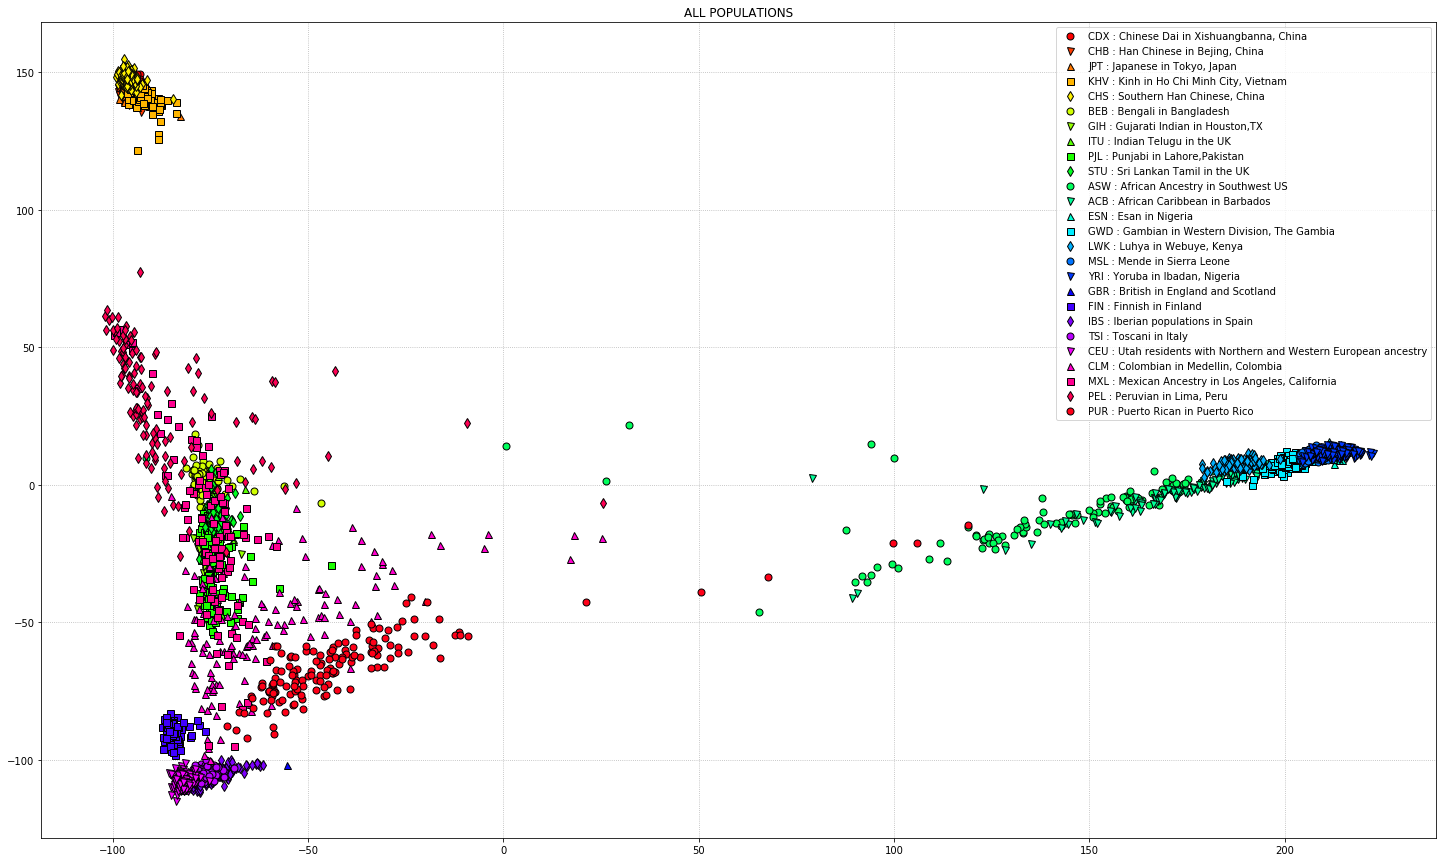

In [33]:
# Plotting all the populations
plot_map(x,y,linestyle=' ',name='plot_300K_blank',title='ALL POPULATIONS')

with open("log.txt",'a',encoding = 'utf-8') as f:   
    f.write(get_time() + "[F] Saved 'plot_300k_blank.png'\n")

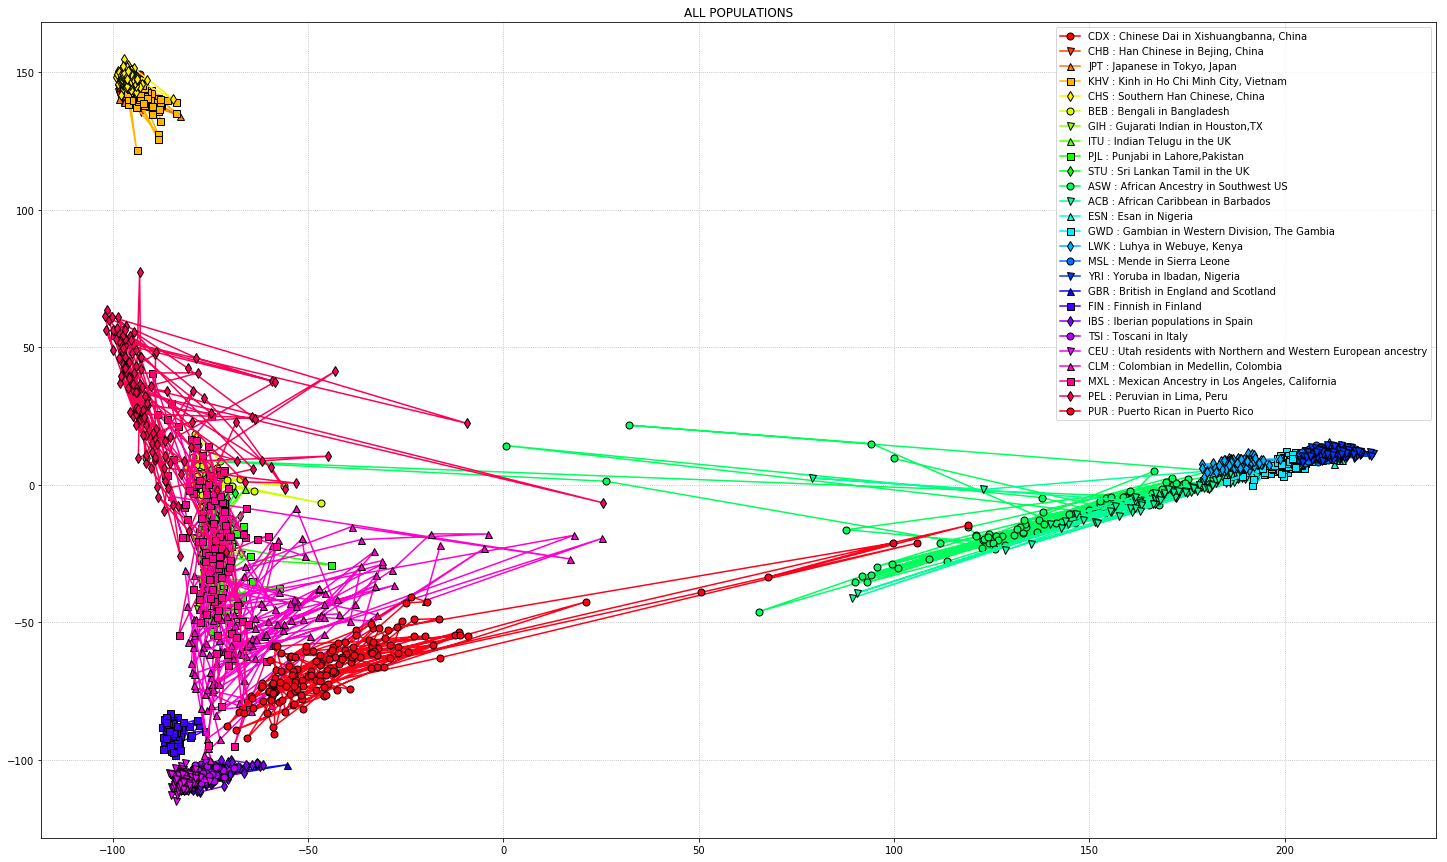

In [34]:
# Lines along with points help determine clusters
plot_map(x,y,linestyle='-',name='plot_300K_line',title='ALL POPULATIONS')

with open("log.txt",'a',encoding = 'utf-8') as f:   
    f.write(get_time() + "[F] Saved 'plot_300k_line.png'\n")

## [2] Analyzing population groups

In [35]:
### Sorting populations by super-population

pop_dict = {'EAS' : 'East Asia',
            'SAS' : 'South Asia',
            'AFR' : 'Africa',
            'EUR' : 'Europe',
            'AMR' : 'Americas'
           }

super_pop_name = list(pop_dict.keys())

EAS = []
SAS = []
AFR = []
EUR = []
AMR = []

for index in range(len(labels)):
    
    super_pop = labels['Super Population'][index]
    pop_code = labels['Population Code'][index]
        
    if(super_pop == 'EAS'): EAS.append(pop_code)
    if(super_pop == 'SAS'): SAS.append(pop_code) 
    if(super_pop == 'AFR'): AFR.append(pop_code) 
    if(super_pop == 'EUR'): EUR.append(pop_code) 
    if(super_pop == 'AMR'): AMR.append(pop_code) 
    
# Super list containg lists of populations
super_pop_list = [EAS,SAS,AFR,EUR,AMR]

# Printing out population descriptions
for idx in range(len(super_pop_list)):
    
    print("Population Descriptions : ")
    
    name = super_pop_name[idx]
    pops = super_pop_list[idx]
    
    print(name, ' : ', pop_dict[name])

    for i in range(len(pops)):
        print('\t',pops[i], ' : ', get_dis(pops[i]))
    
    print('---------------------------------------------------')

Population Descriptions : 
EAS  :  East Asia
	 CDX  :  Chinese Dai in Xishuangbanna, China
	 CHB  :  Han Chinese in Bejing, China
	 JPT  :  Japanese in Tokyo, Japan
	 KHV  :  Kinh in Ho Chi Minh City, Vietnam
	 CHS  :  Southern Han Chinese, China
---------------------------------------------------
Population Descriptions : 
SAS  :  South Asia
	 BEB  :  Bengali in Bangladesh
	 GIH  :  Gujarati Indian in Houston,TX
	 ITU  :  Indian Telugu in the UK
	 PJL  :  Punjabi in Lahore,Pakistan
	 STU  :  Sri Lankan Tamil in the UK
---------------------------------------------------
Population Descriptions : 
AFR  :  Africa
	 ASW  :  African Ancestry in Southwest US
	 ACB  :  African Caribbean in Barbados
	 ESN  :  Esan in Nigeria
	 GWD  :  Gambian in Western Division, The Gambia
	 LWK  :  Luhya in Webuye, Kenya
	 MSL  :  Mende in Sierra Leone
	 YRI  :  Yoruba in Ibadan, Nigeria
---------------------------------------------------
Population Descriptions : 
EUR  :  Europe
	 GBR  :  British in Englan

In [36]:
### Other interesting population groups

# Pure african populations
pure_AFR = ['LWK','ESN','GWD','YRI','MSL']

# African american populations
AFR_AMR = ['ASW','ACB']

## [3] Plotting closely clustered groups

* Populations of East Asia (EAS), South Asia (SAS), Africa(pure_AFR) and Europe(EUR) are clustered together.
* Populations of Americas(AMR) somewhat spread out.
* Populations of African Americans(AFR_AMR) are stretched between those of pure Africans(pure_AFR) and Americans(AMR), as expected.

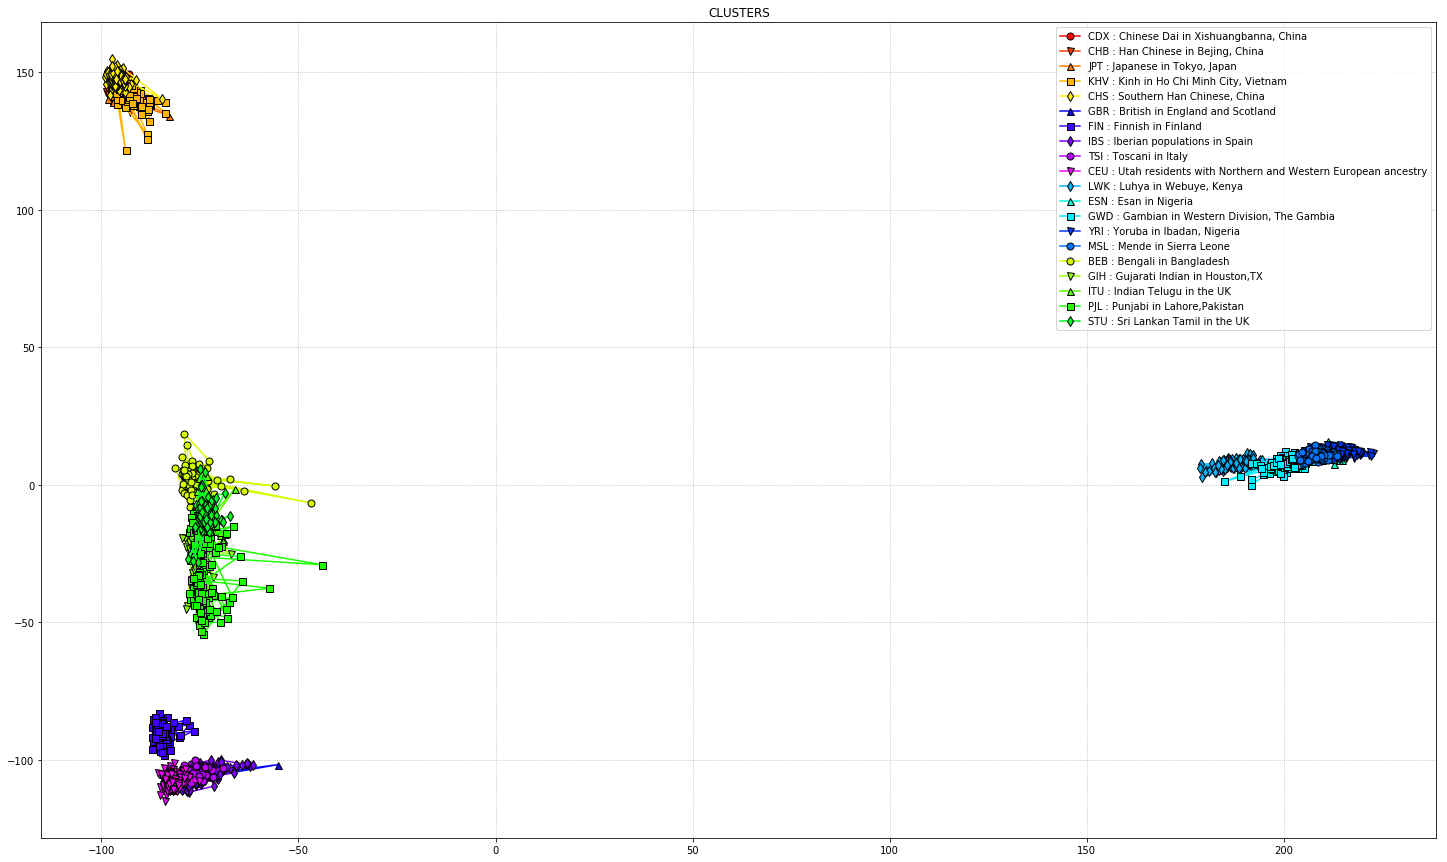

In [37]:
# Plotting only the populations that are clustered together, 
# that is everything except American and two African populations

clusters = EAS + EUR + pure_AFR + SAS
spread = AFR_AMR

plot_map(x,y,points=clusters,title='CLUSTERS',name='clusters_300k')

with open("log.txt",'a',encoding = 'utf-8') as f:   
    f.write(get_time() + "[F] Saved 'clusters_300k.png'\n")

## [4] Plotting super population groups

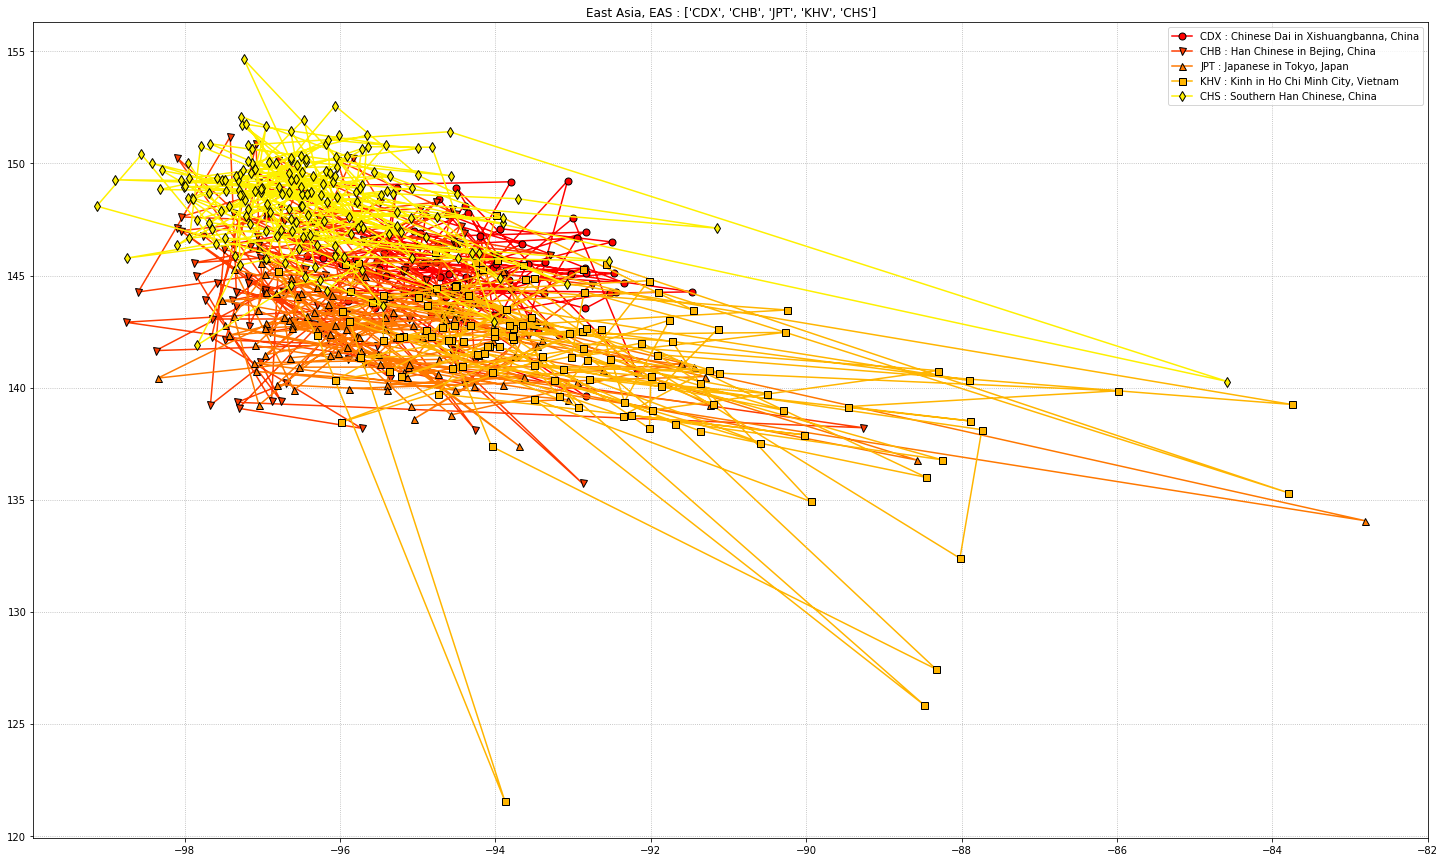

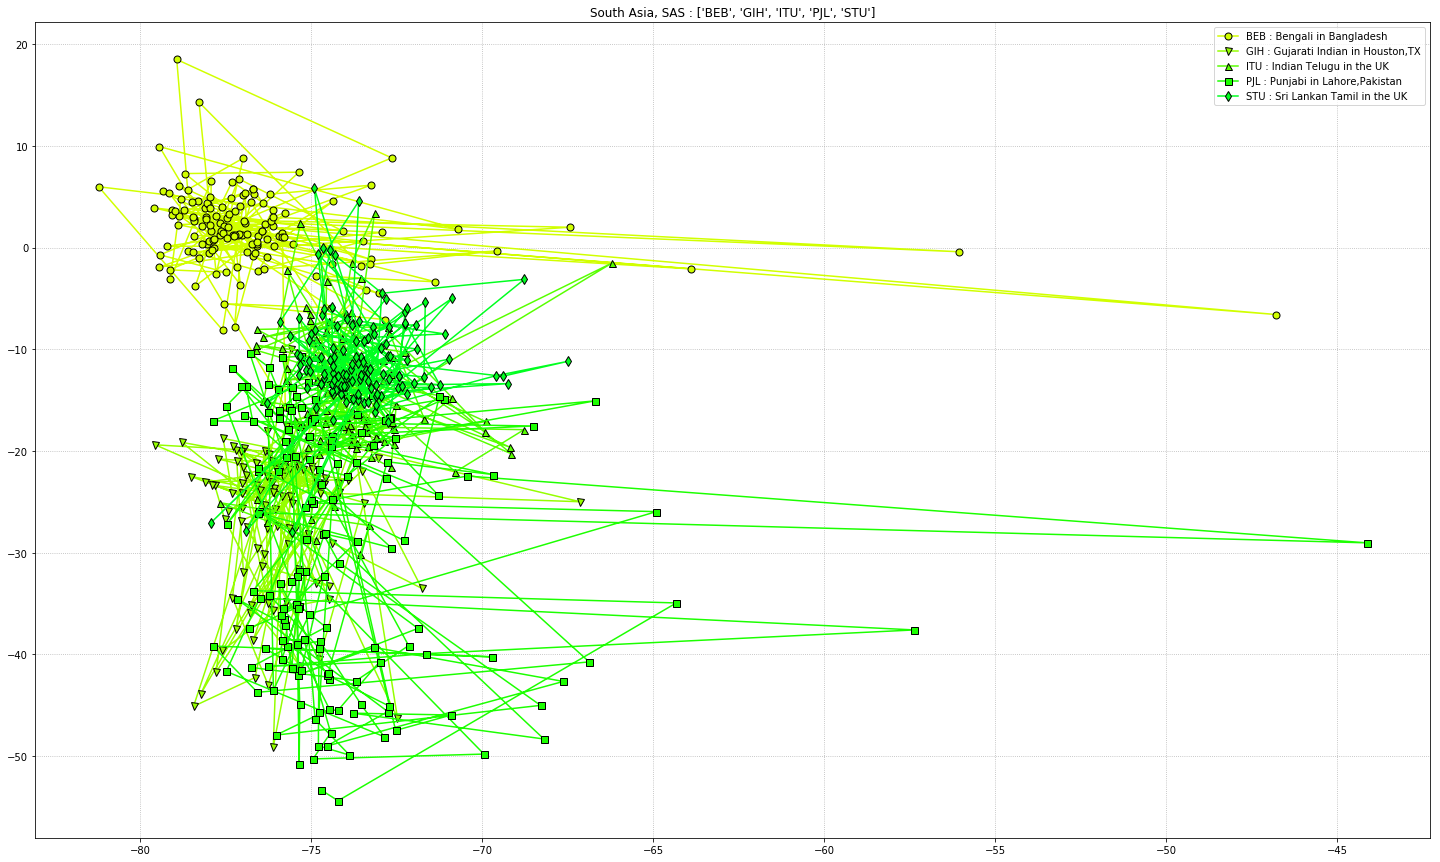

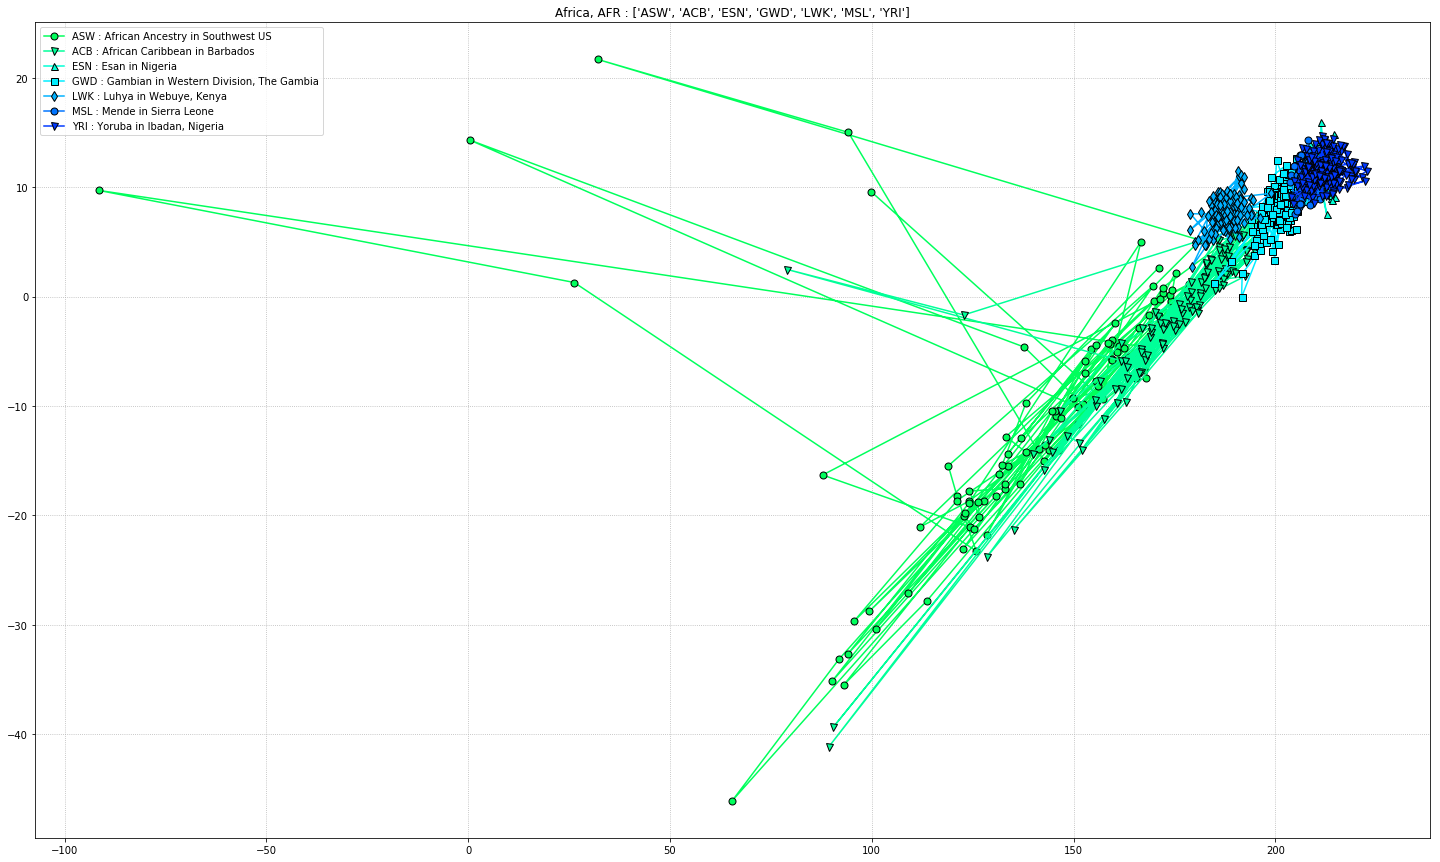

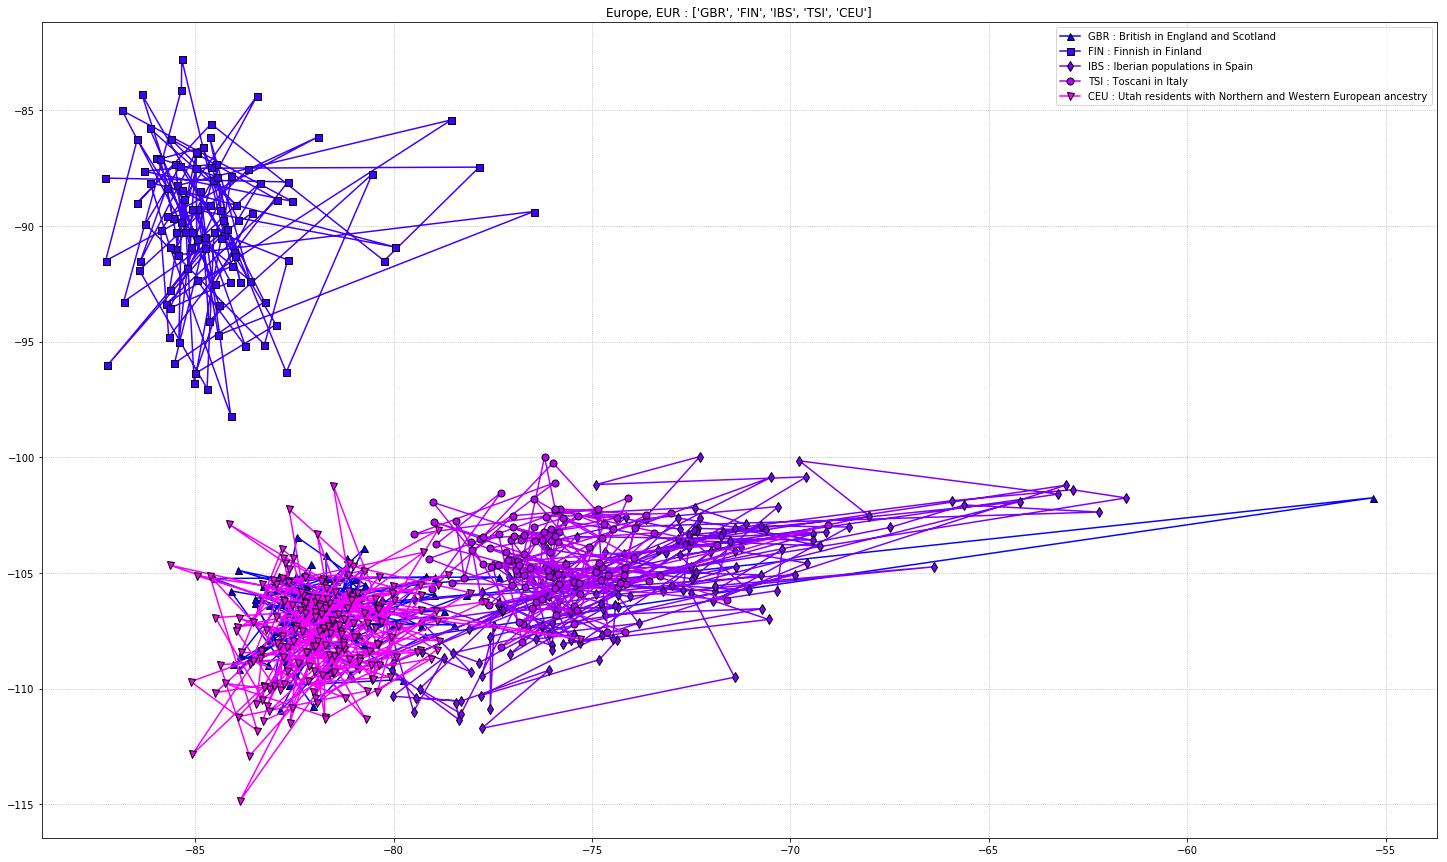

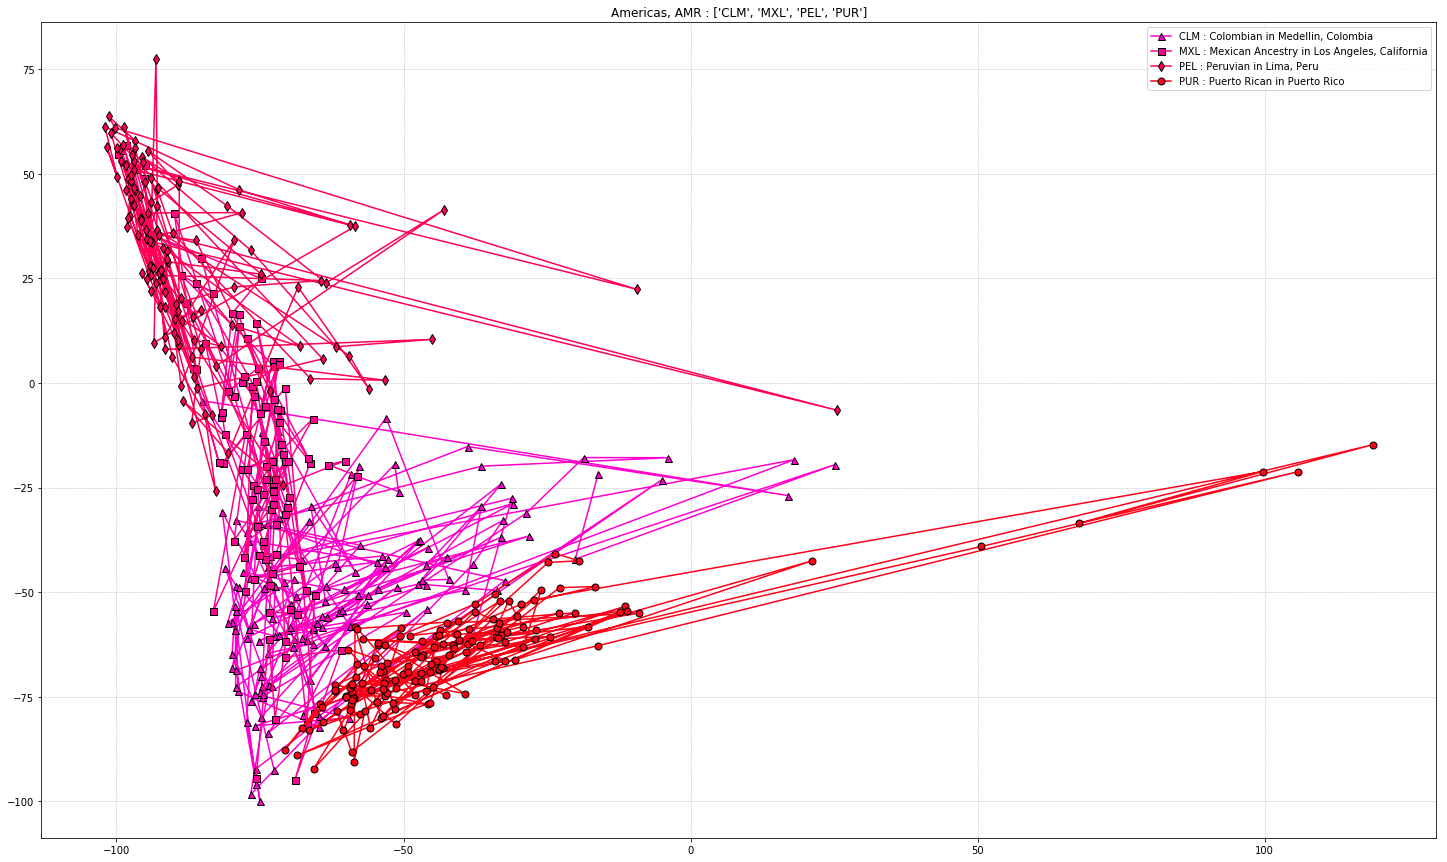

In [40]:
# Plotting super population groups

for i in range(len(super_pop_list)):
    points = super_pop_list[i]
    
    name = super_pop_name[i]
    title = pop_dict[name] + ', ' + name + ' : ' + str(points)
    
    plot_map(x, y, points=points, title = title, name = 'superpop_' + name + '_300k.png')
    
    with open("log.txt",'a',encoding = 'utf-8') as f:   
        f.write(get_time() + "[F] Saved 'superpop_" + name + "_300k.png'\n")
        
with open("log.txt",'a',encoding = 'utf-8') as f:   
    f.write(get_time() + "[F] Saved all super-population plots\n")

## [5] Plotting spread out groups

* Populations of Americans lie between those of Europeans and East Asians.
* They also overlap significantly with those of South Asia (esp. MXL).

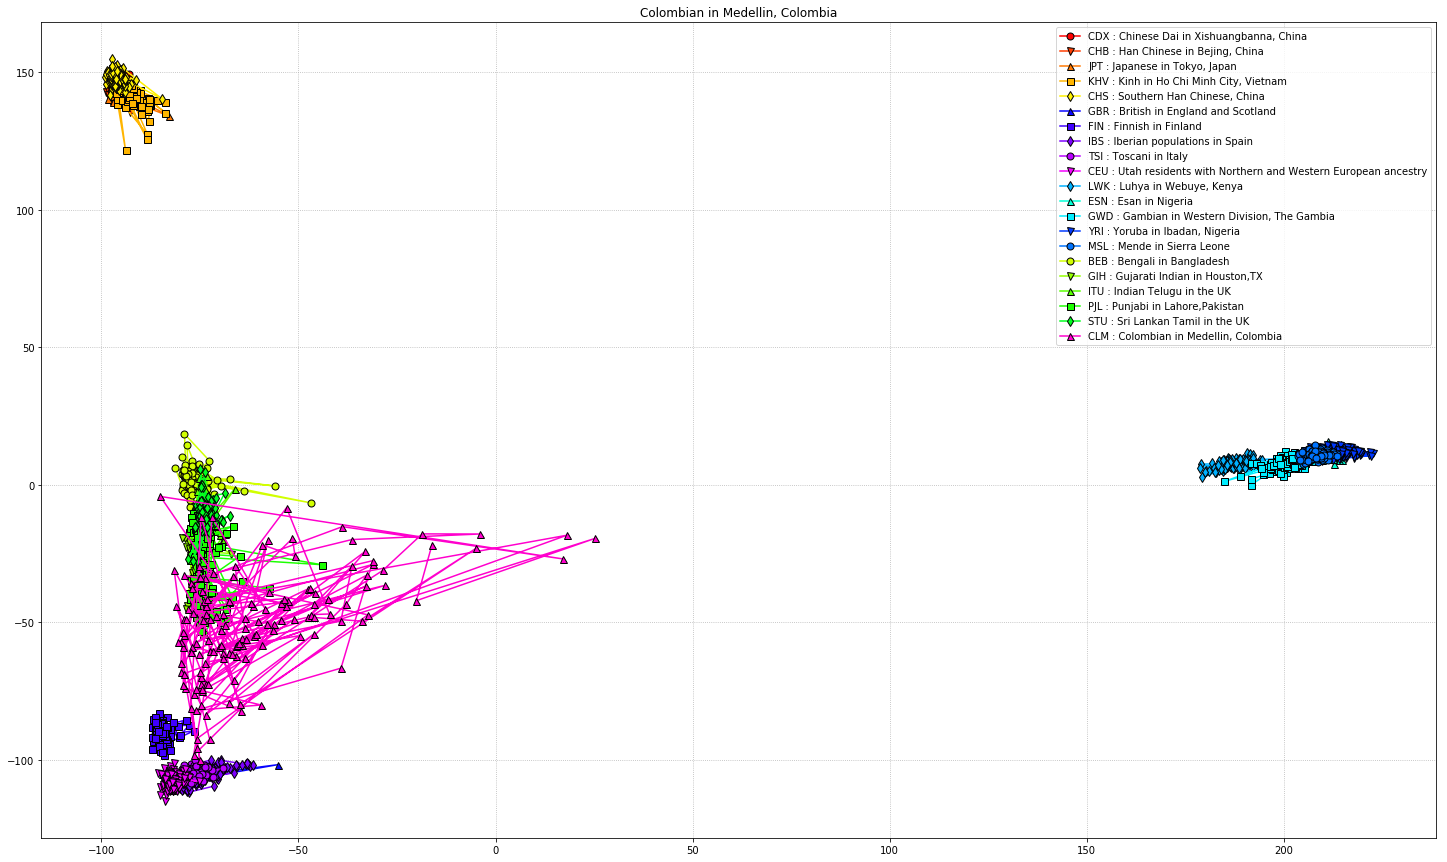

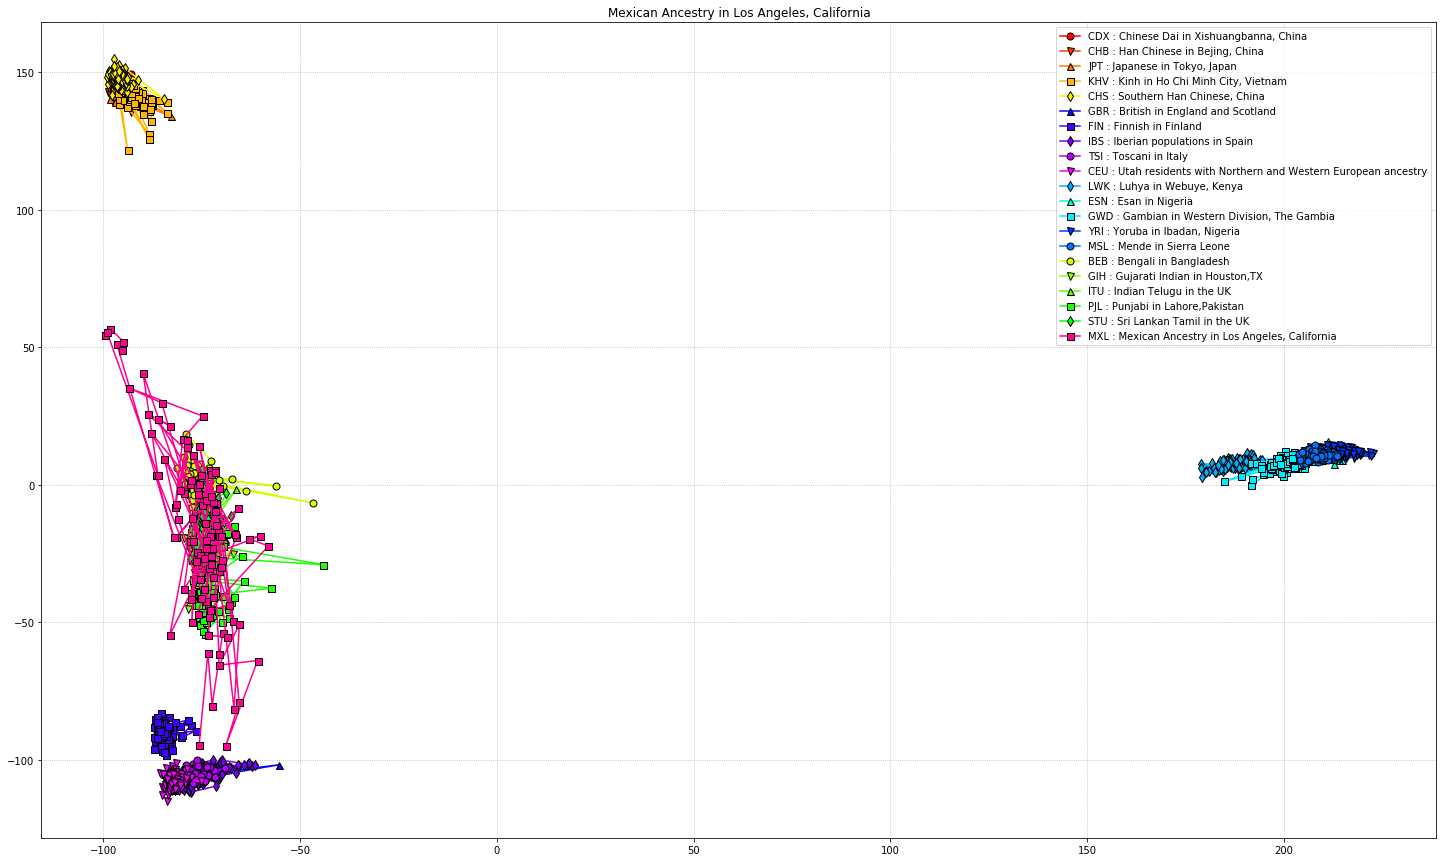

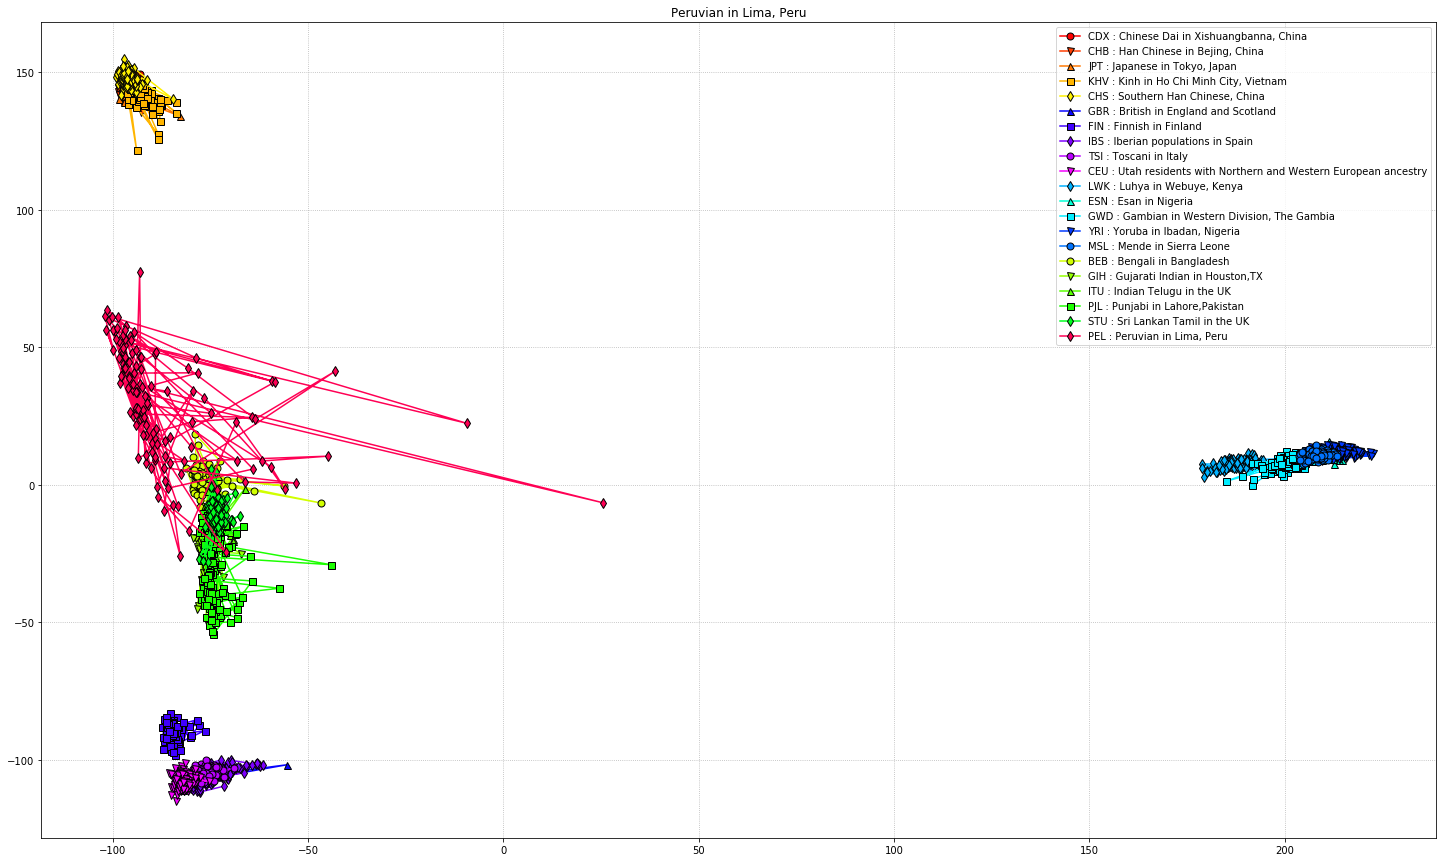

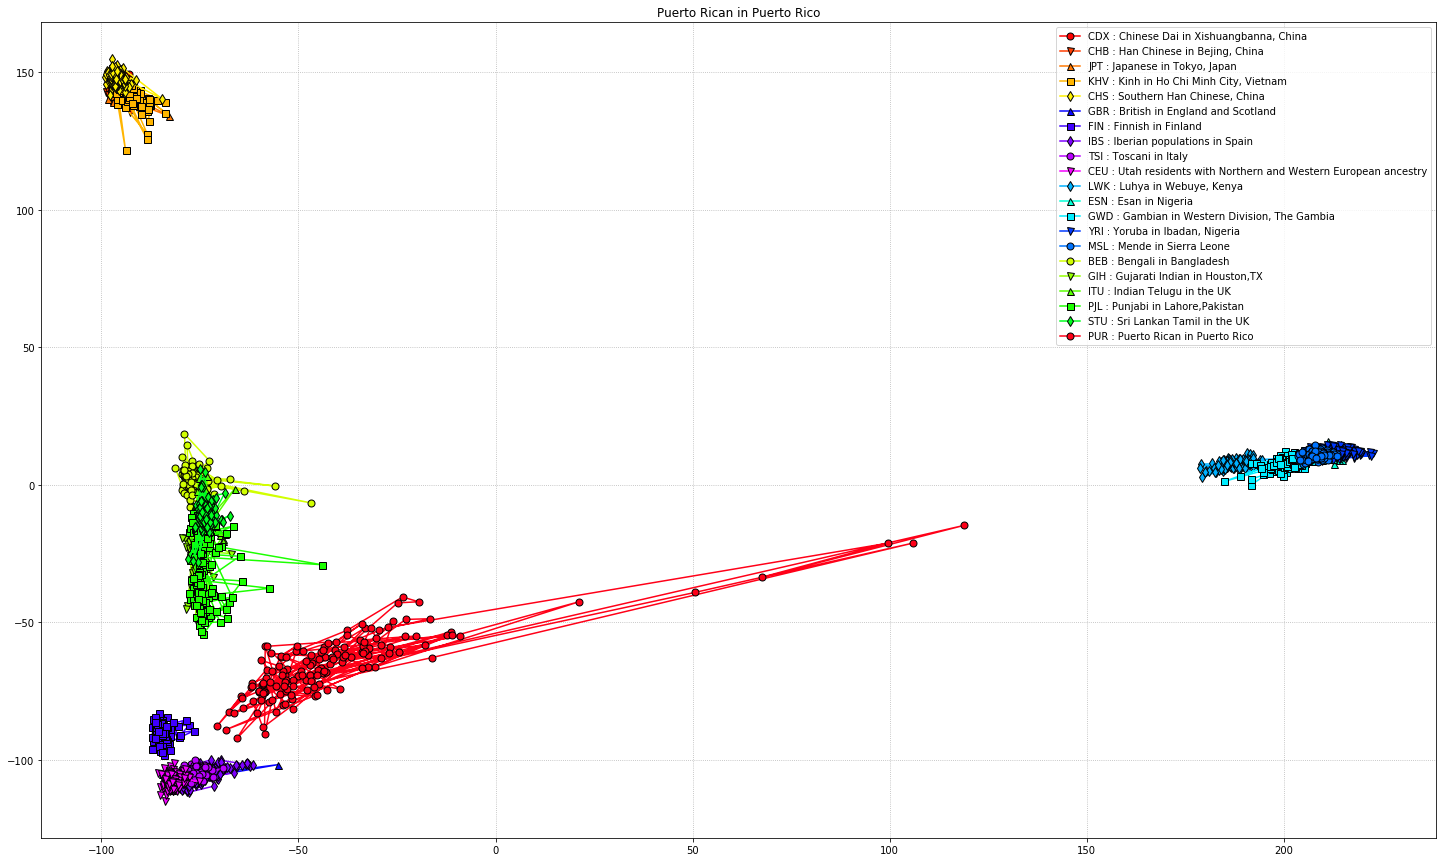

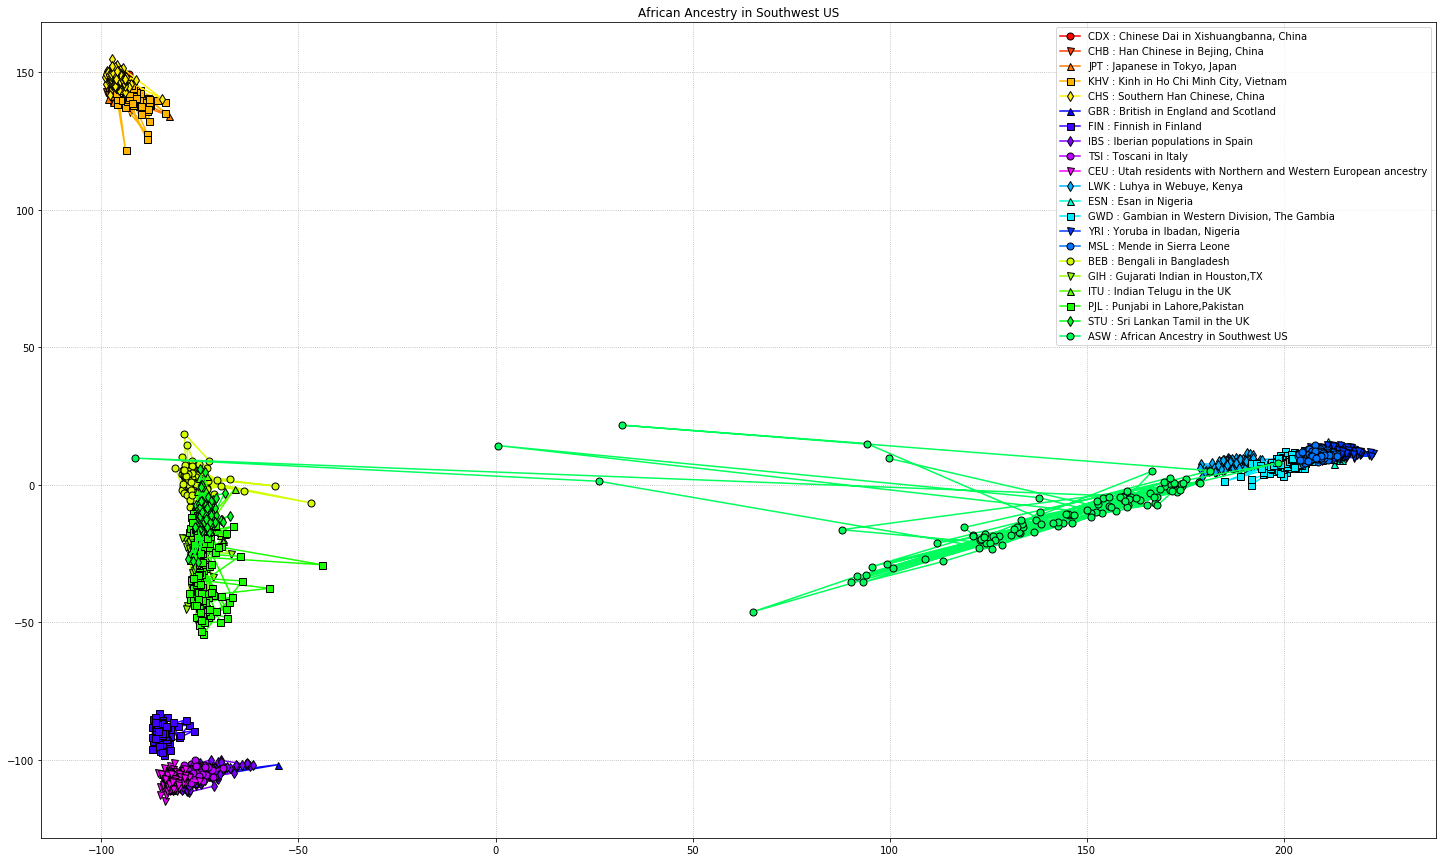

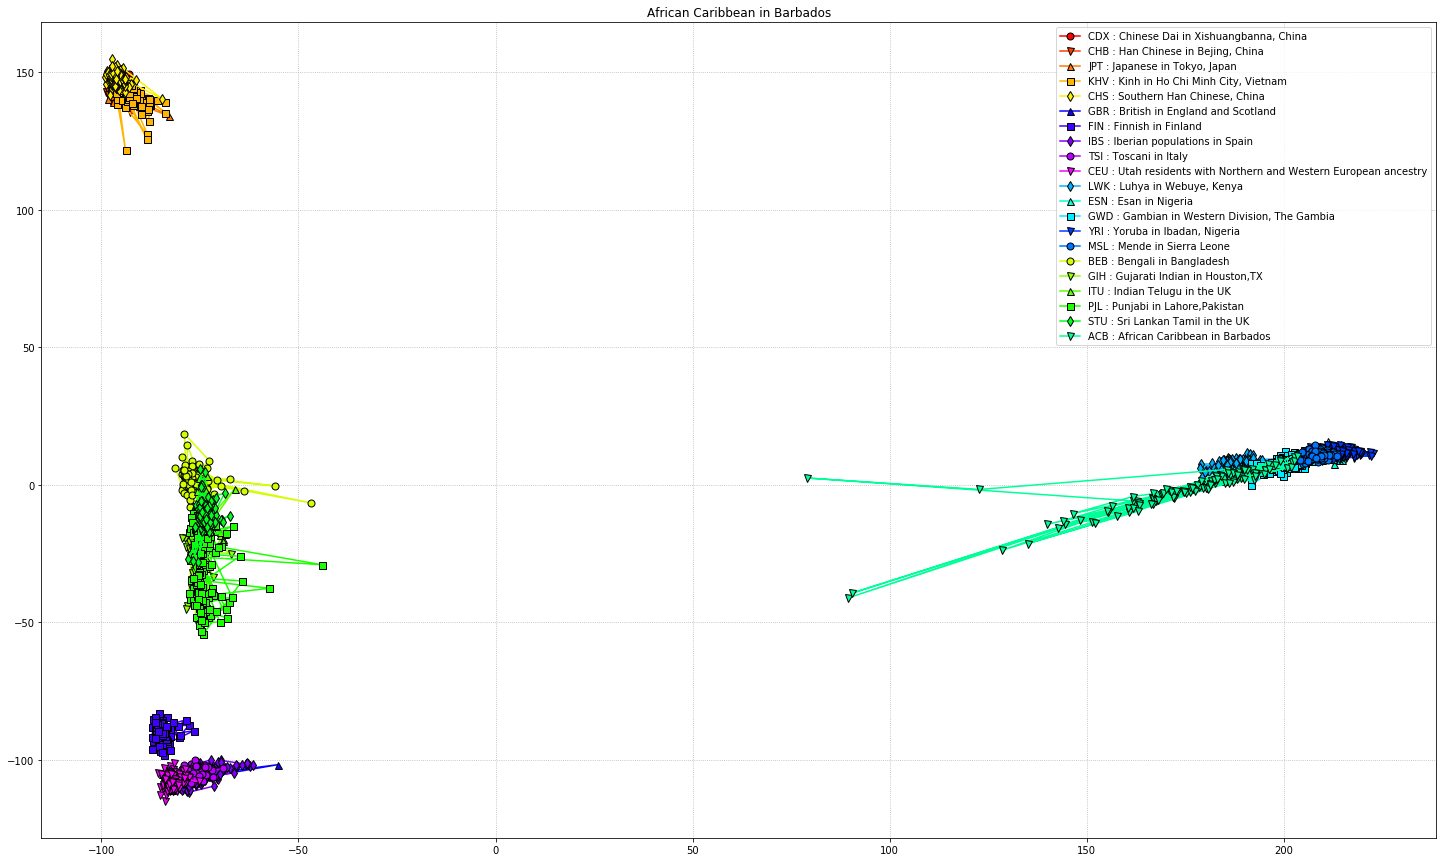

In [41]:
# Seeing the variation of populations that are spread out 
# relative to those that are clustered

# Clustered populations
clusters = EAS + EUR + pure_AFR + SAS

# Spread out populations
spread = AMR + AFR_AMR

# Plotting each spread out populations with all the clustered ones
for i in spread:    
    points = clusters + [i]    
    plot_map(x,y,points=points,title='describe',name='variation_' + i + '_300k.png')

## [6] Analyzing African-american populations

* Populations of Africans in the United States(ASW) and in the Caribbean(ACB) are stretched out between those of pure Africans and Americans

ASW  :  African Ancestry in Southwest US
ACB  :  African Caribbean in Barbados


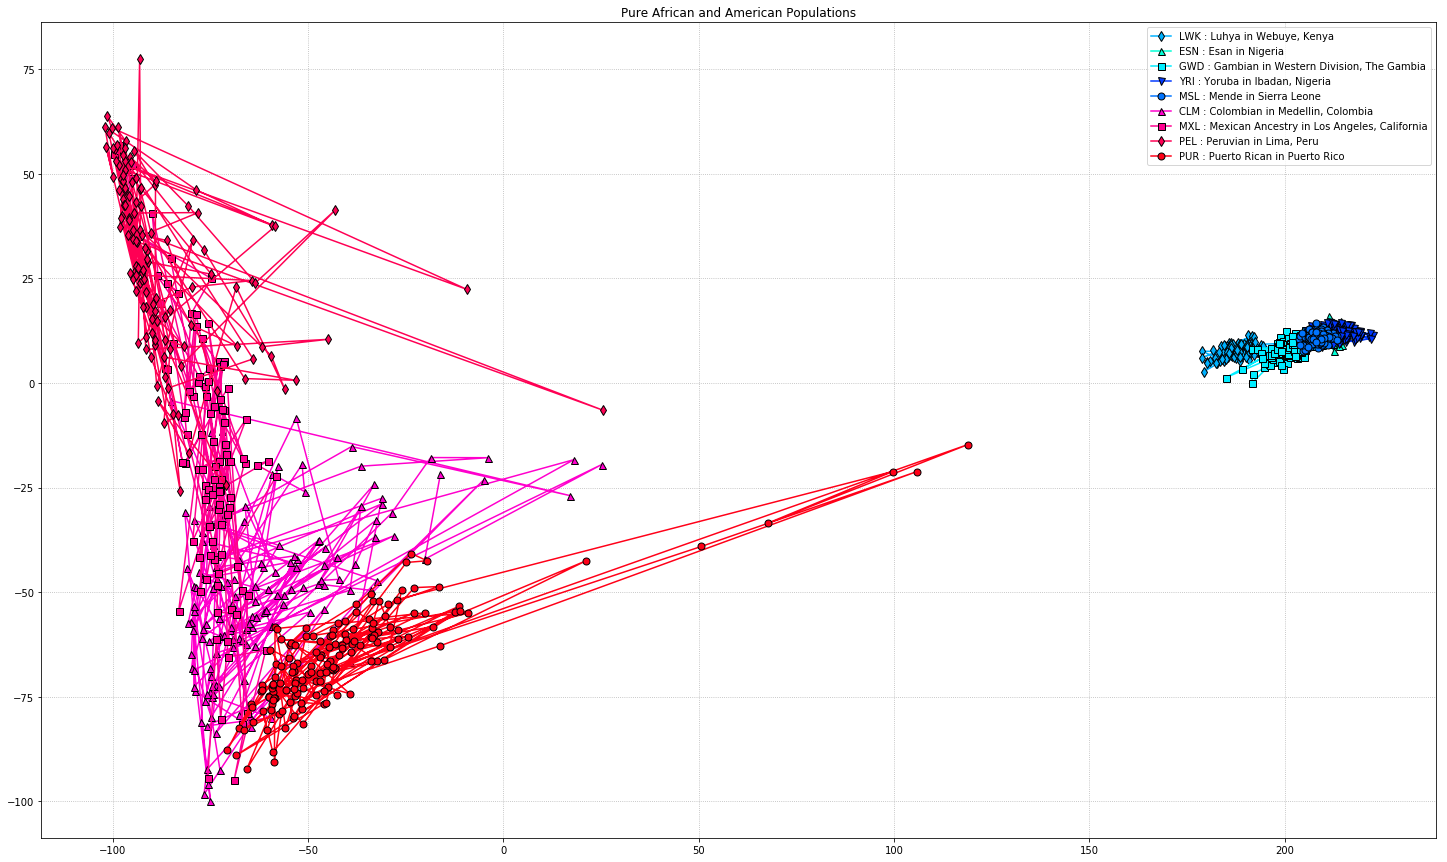

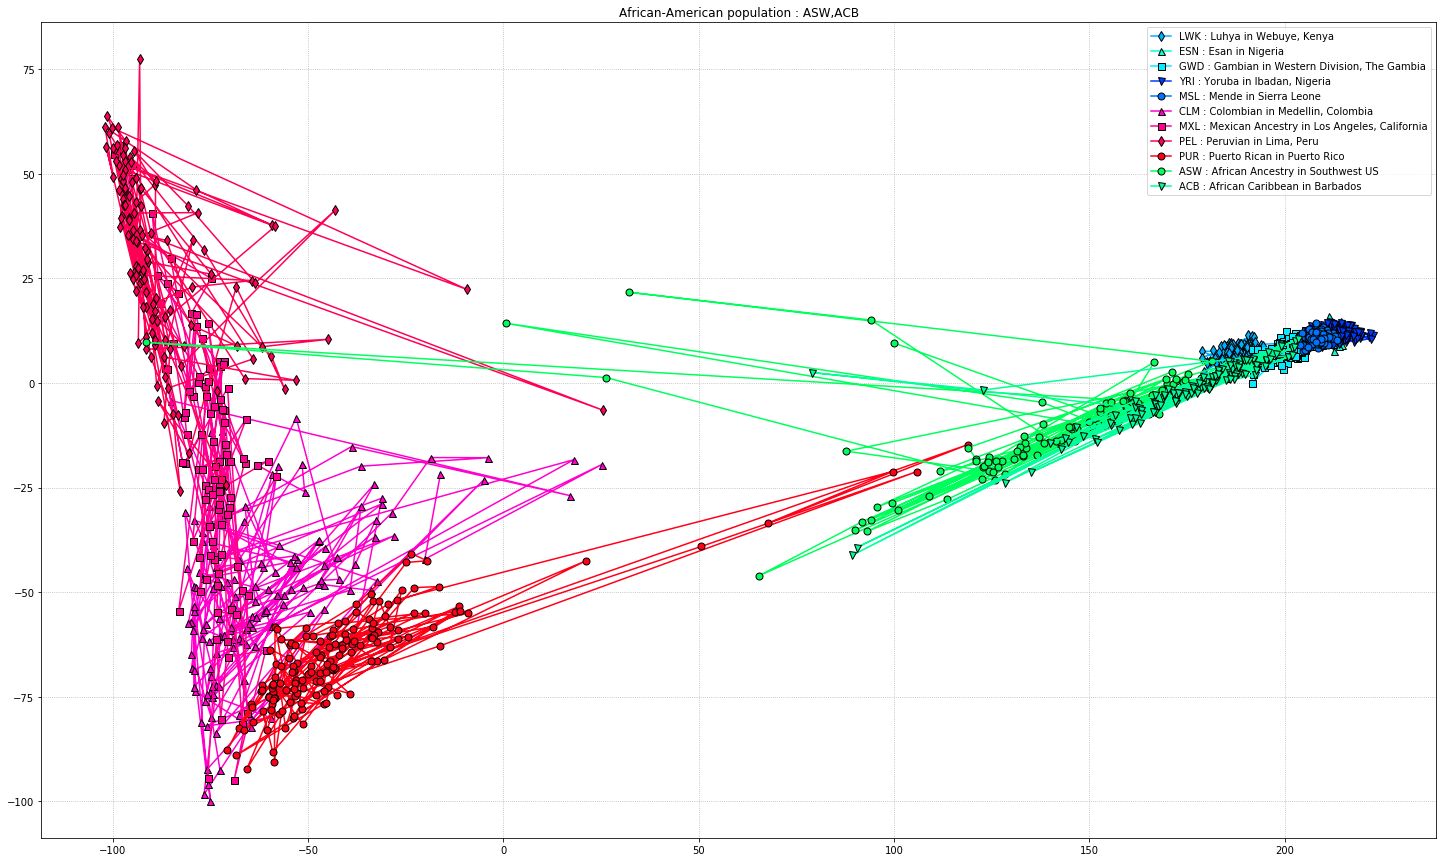

In [42]:
# Analyzing the variation between two african populations in 'AFR_AMR'

for pop in AFR_AMR:
    print(pop, ' : ', get_dis(pop))

points = pure_AFR + AMR
plot_map(x,y,points=points,title='Pure African and American Populations',name='Afr_1_300k.png')

points = pure_AFR + AMR + AFR_AMR
plot_map(x,y,points=points,title='African-American population : ASW,ACB',name='Afr_2_300k.png')

with open("log.txt",'a',encoding = 'utf-8') as f:   
        f.write(get_time() + "[F] Saved miscellaneous plots\n")

In [43]:
with open("log.txt",'a',encoding = 'utf-8') as f:   
        f.write(get_time() + "[F] Plotting Completed\n")
        f.write(get_time() + "[F] Exiting Program\n")
        f.write("-------------------------------------------------------\n")